## Scraping tweets

In [1]:
#!twint -s 'End Sars' --json ./endsars.json -ho

## Data Cleaning and EDA

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc

In [2]:
pd.options.display.max_columns=100

In [3]:
#load scraped tweet from file
tweet1 = pd.read_json('./endsars.json', lines=True)
tweet2 = pd.read_csv('./endsars.csv', sep='\t')
data = pd.concat([tweet1, tweet2], ignore_index=False)

In [4]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1374731690187296771,1374711687853531136,2021-03-24 15:35:50 W. Central Africa Standard...,2021-03-24 00:00:00,15:35:50,100,2527784056,de_paragon1,E.M.EKAрџ—ЇпёЏ,,@SaharaReporters @HQNigerianArmy There is no e...,en,"[{'screen_name': 'saharareporters', 'name': 's...",[],[],0,0,0,[endsars],[],https://twitter.com/De_Paragon1/status/1374731...,False,,0,,,,,,,,"[{'screen_name': 'SaharaReporters', 'name': 'S...",,,,
1,1374731603772063746,1374731603772063744,2021-03-24 15:35:30 W. Central Africa Standard...,2021-03-24 00:00:00,15:35:30,100,143812224,edwardessien,Edward Essien,,We are too foolish in this southern part of th...,en,"[{'screen_name': 'jidesanwoolu', 'name': 'baba...",[],[],0,0,0,"[lekkitollgate, endsars]",[],https://twitter.com/edwardessien/status/137473...,False,https://twitter.com/channelstv/status/13747216...,0,,,,,,,,[],,,,
2,1374731390982438918,1374730915537158144,2021-03-24 15:34:39 W. Central Africa Standard...,2021-03-24 00:00:00,15:34:39,100,1147389496448749568,julietrixhinna,JULIET#Endsars,,@DONJAZZY @crayonthis Nice,en,[],[],[],0,0,0,[],[],https://twitter.com/julietrixhinna/status/1374...,False,,0,,,,,,,,"[{'screen_name': 'DONJAZZY', 'name': 'ITвЂ™S D...",,,,
3,1374731345918898176,1374731345918898176,2021-03-24 15:34:28 W. Central Africa Standard...,2021-03-24 00:00:00,15:34:28,100,1326270907644583948,olawalenedved,Nedved рџ‡ірџ‡¬рџ‡єрџ‡ёрџ¤ґрџЏѕ#EndSARS,,@HQNigerianArmy and @PoliceNG are killing the...,en,"[{'screen_name': 'policeng', 'name': 'nigeria ...",[],[],0,0,0,"[revolutionnow, endsars]",[],https://twitter.com/OlawaleNedved/status/13747...,False,,0,,,,,,,,[],,,,
4,1374731332455137282,1374728771530539008,2021-03-24 15:34:25 W. Central Africa Standard...,2021-03-24 00:00:00,15:34:25,100,1278267037404594176,underscoretunc1,рџ”Ґв™Ёрџ‡±рџ‡ѕ #EndSars D рџ‘Ђ рџ‡±рџ‡ѕ в™Ёрџ”Ґ,,@SaharaReporters @MBuhari @NGRPresident #EndSa...,en,[],[],[],0,0,0,"[endsars, mbuhari, change]",[],https://twitter.com/UnderscoreTunc1/status/137...,False,,0,,,,,,,,"[{'screen_name': 'SaharaReporters', 'name': 'S...",,,,


In [5]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [72]:
tweets = data[['date', 'tweet', 'language', 'hashtags']]
tweets.head()

,date,tweet,language,hashtags
0,2021-03-24 00:00:00,@SaharaReporters @HQNigerianArmy There is no e...,en,[endsars]
1,2021-03-24 00:00:00,We are too foolish in this southern part of th...,en,"[lekkitollgate, endsars]"
2,2021-03-24 00:00:00,@DONJAZZY @crayonthis Nice,en,[]
3,2021-03-24 00:00:00,@HQNigerianArmy and @PoliceNG are killing the...,en,"[revolutionnow, endsars]"
4,2021-03-24 00:00:00,@SaharaReporters @MBuhari @NGRPresident #EndSa...,en,"[endsars, mbuhari, change]"


In [8]:
h = []
for i in tweets['hashtags']:
    h+=i
hashtags_str = ' '.join(h)

HASHTAGS



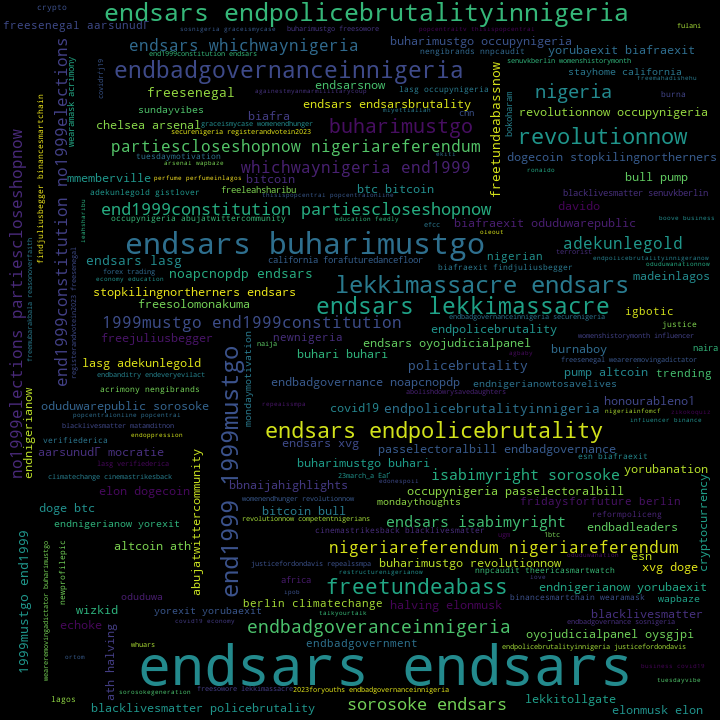

In [62]:
print("HASHTAGS\n")
hashtag_wc = wc.WordCloud(width=720, height=720, min_word_length=3)
display(hashtag_wc.generate(hashtags_str).to_image())

In [9]:
mentions = tweets['tweet'].str.extractall(r"(@\S+)")

In [10]:
mentions = mentions[0].value_counts().to_dict()

MENTIONS



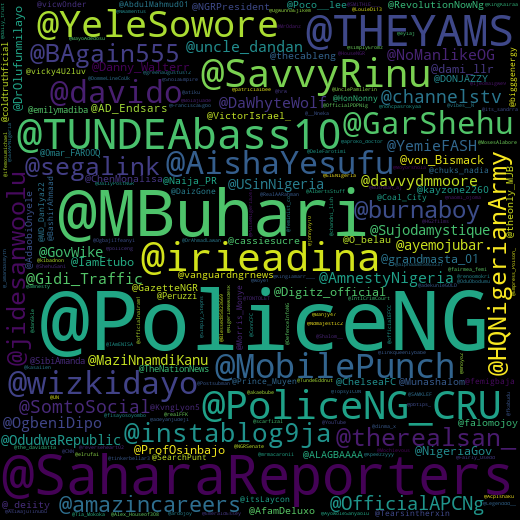

In [71]:
print("MENTIONS\n")
mentions_wc = wc.WordCloud(width=520, height=520)
display(mentions_wc.generate_from_frequencies(mentions).to_image())

In [77]:
tweets['date'].value_counts()

2021-03-23 00:00:00    3377
2021-03-23             3376
2021-03-22 00:00:00    3062
2021-03-22             3058
2021-03-24             2729
2021-03-21 00:00:00    2065
2021-03-21             1913
2021-03-24 00:00:00    1736
Name: date, dtype: int64

In [35]:
language = tweets['language'].value_counts()

In [14]:
l_index = [
 'English', 'Unknown', 'French', 'Tagalog', 'Indonesian', 'Spanish', 'Haitian Creole', 'Portuguese',
 'Danish', 'German', 'Estonian', 'Polish', 'Italian', 'Turkish', 'Basque', 'Icelandic', 'Dutch ',
 'Catalan', 'Norwegian', 'Welsh', 'Czech', 'Swedish', 'Finnish', 'Vietnamese', 'Latvian', 'Lithuanian',
 'Japanese', 'Romanian', 'Hindi'
]

In [19]:
language.index=l_index
language

English           17286
Unknown            2657
French              326
Tagalog             233
Indonesian          165
Spanish              97
Haitian Creole       90
Portuguese           58
Danish               53
German               49
Estonian             40
Polish               38
Italian              31
Turkish              30
Basque               19
Icelandic            18
Dutch                18
Catalan              16
Norwegian            16
Welsh                15
Czech                13
Swedish              10
Finnish               9
Vietnamese            6
Latvian               6
Lithuanian            6
Japanese              4
Romanian              4
Hindi                 3
Name: language, dtype: int64

Text(0.5, 1.0, 'Tweets Language')

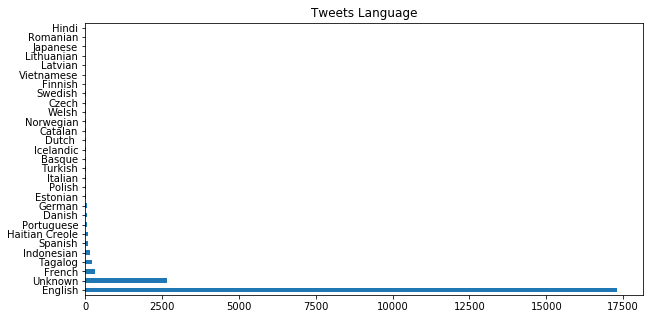

In [18]:
language.plot.barh(figsize=(10,5))
plt.title('Tweets Language')

People from various countries tweeted about the #ENDSARS movement

In [54]:
import re

def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub('r<.*?>', '', text)
    return text

In [73]:
# Drop all tweets that were tweeted in other languages aside English.
tweets = tweets[tweets['language']=='en']
tweets.shape

(17286, 4)

## Sentiment Analysis with VADER sentiment analyzer
Developed in 2014, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained model that uses rule-based values tuned to sentiments from social media. It evaluates the text of a message and gives you an assessment of not just positive and negative, but the intensity of that emotion as well.

It uses a dictionary of terms that it can evaluate. From the GitHub repository this includes examples like:

Negations - a modifier that reverses the meaning of a phrase ("not great").
Contractions - negations, but more complex ("wasn’t great").
Punctuation - increased intensity ("It’s great!!!").
Slang - variations of slang words such as "kinda", "sux", or "hella".
It's even able to understand acronyms ("lol") and emoji (❤).

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
# gets the likely sentiment of a tweet Using the NLTK VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#### VADER sentiment analyzer isn't necessarily affected whether the text is cleaned or not as it is built to handle social media data and this is proved below

In [76]:
sample = ''.join(tweets['tweet'][0].values)
sample

'@SaharaReporters @HQNigerianArmy There is no evidence they are ESN members.. Just gather boys on the street, kill them and tag them IPOB.  @SaharaReporters I\'m quite disappointed in you people to tag extrajudicial killing of youths "ESN".  Nigerian Soldiers killed #EndSARS protesters and lied but u believed thiswhen you’re bisexually in love with your opposite sex partner but also wanna whoop on them for making you look str8  https://t.co/euxEnX1fy5'

In [78]:
sample_cleaned = clean_tweet(''.join(sample))
sample_cleaned

'  There is no evidence they are ESN members.. Just gather boys on the street, kill them and tag them IPOB.   I\'m quite disappointed in you people to tag extrajudicial killing of youths "ESN".  Nigerian Soldiers killed  protesters and lied but u believed thiswhen you’re bisexually in love with your opposite sex partner but also wanna whoop on them for making you look str  '

In [79]:
analyzer.polarity_scores(sample)

{'neg': 0.191, 'neu': 0.736, 'pos': 0.072, 'compound': -0.6753}

#### compound ranges from -1 to 1 and the closer the compund is to 1 the more positive the sentiment will be and the more it is to -1 the more negative the sentiment will be

In [80]:
analyzer.polarity_scores(sample_cleaned)

{'neg': 0.204, 'neu': 0.719, 'pos': 0.077, 'compound': -0.6753}

In [81]:
def get_sentiment(data):
    """
    Get sentiment for the comments in the data.
    """
    score = analyzer.polarity_scores(data)
    if score['compound'] > 0.05: print('Positive')
    elif score['compound'] < -0.05: print('Negative')
    else: print('Neutral')
    

In [82]:
get_sentiment(sample)

Negative


In [83]:
get_sentiment(sample_cleaned)

Negative


In [96]:
def get_sentiment(data):
    """
    Get sentiment for the tweets in the data.
    """
    sentiments = []
    sentiment_probab = []
    for comment in data['tweet']:
        #comment = ''.join(comment.values)
        score = analyzer.polarity_scores(comment)
        sentiment_probab.append(score['compound'])
        if score['compound'] > 0:
            sentiments.append('Positive')
        else:
            sentiments.append('Negative')
    data['sentiments'] = sentiments
    data['compound'] = sentiment_probab
    return data

In [97]:
# assigne sentiment to tweets
tweet_sent = get_sentiment(tweets)

In [98]:
tweet_sent.head()

,date,tweet,language,hashtags,sentiments,compound
0,2021-03-24 00:00:00,@SaharaReporters @HQNigerianArmy There is no e...,en,[endsars],Negative,-0.9071
1,2021-03-24 00:00:00,We are too foolish in this southern part of th...,en,"[lekkitollgate, endsars]",Negative,-0.8934
2,2021-03-24 00:00:00,@DONJAZZY @crayonthis Nice,en,[],Positive,0.4215
3,2021-03-24 00:00:00,@HQNigerianArmy and @PoliceNG are killing the...,en,"[revolutionnow, endsars]",Negative,-0.8689
4,2021-03-24 00:00:00,@SaharaReporters @MBuhari @NGRPresident #EndSa...,en,"[endsars, mbuhari, change]",Negative,-0.8020


In [100]:
sentiment = tweet_sent['sentiments'].value_counts()

Text(0.5, 0, 'Sentiments')

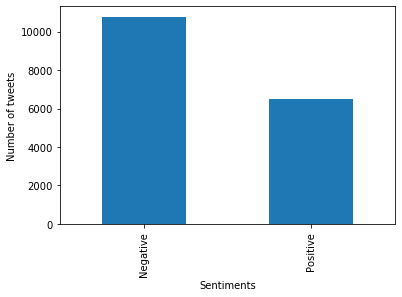

In [102]:
sentiment.plot.bar()
plt.ylabel('Number of tweets')
plt.xlabel('Sentiments')

In [111]:
# Sample of tweets with positive sentiment
for tweet in tweet_sent[tweet_sent['sentiments']=='Positive']['tweet'][:10]:
    print(clean_tweet(tweet), end='\n\n')

  Nice

 Cute рџҐ°

The Nigerian police force clearly learnt nothing from the October end SARS protests.... How do u beat up a guy just cos he doesn't have the receipt to his phone? Like how?

  I don join the queue. LetвЂ™s go

So proud of you auntyвќ¤пёЏвќ¤пёЏ

  kindly look at this and commence your investigation!

Love you baby рџ�—.  Happy birthday рџҐірџҐірџЋ‚

  Thank youрџ¤—

I know damn well this dude isn't out here vaping on this carrer informational session on zoom. Like sit that's a prospective employer talking lol

 Sis is suffering from internalised misogyny we need to give prayer. Because this isnвЂ™t the prize

